# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [60]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
# to check model performance
from sklearn.metrics import mean_squared_error

### Load the dataset

In [50]:
hData = pd.read_csv("boston.csv")  

### Check the shape of the dataset

In [51]:
hData.shape

(506, 13)

### Get the info regarding column datatypes

In [52]:
hData.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

### Get summary statistics for the numerical columns

In [53]:
hData.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

<Figure size 504x288 with 0 Axes>

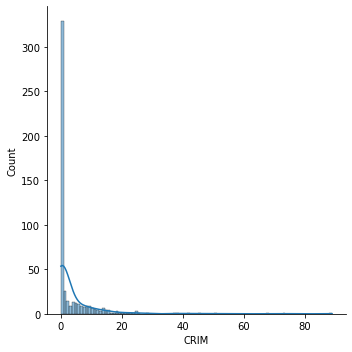

<Figure size 504x288 with 0 Axes>

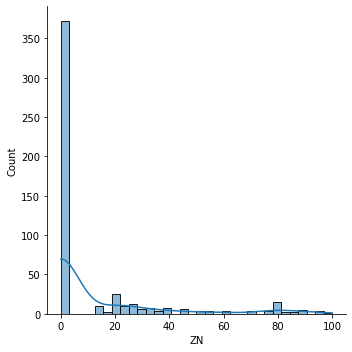

<Figure size 504x288 with 0 Axes>

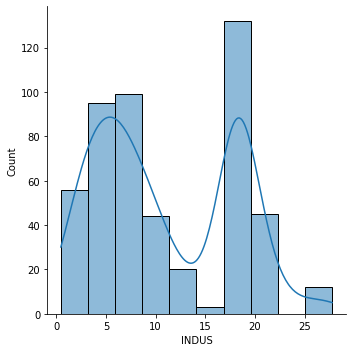

<Figure size 504x288 with 0 Axes>

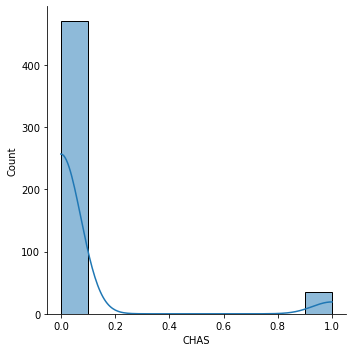

<Figure size 504x288 with 0 Axes>

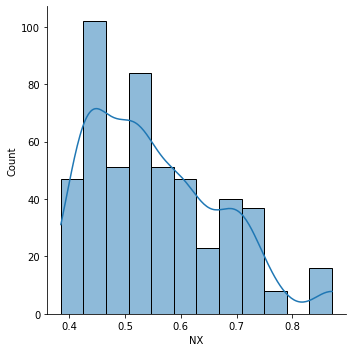

<Figure size 504x288 with 0 Axes>

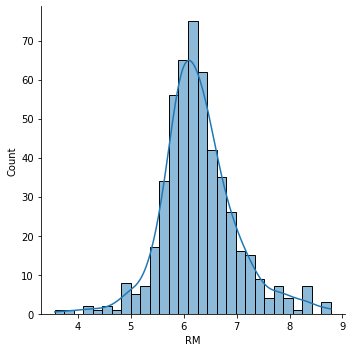

<Figure size 504x288 with 0 Axes>

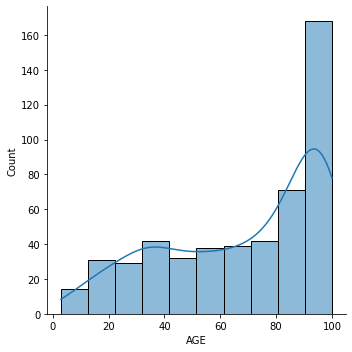

<Figure size 504x288 with 0 Axes>

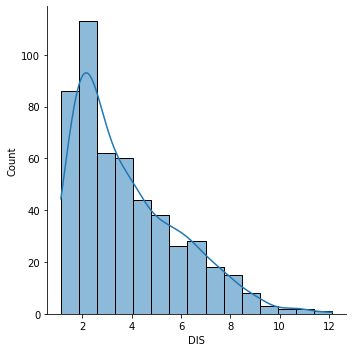

<Figure size 504x288 with 0 Axes>

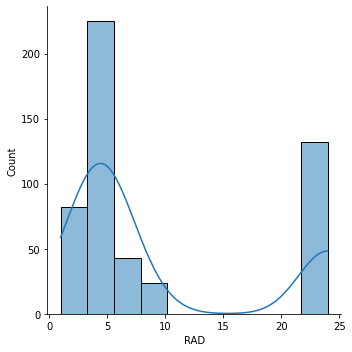

<Figure size 504x288 with 0 Axes>

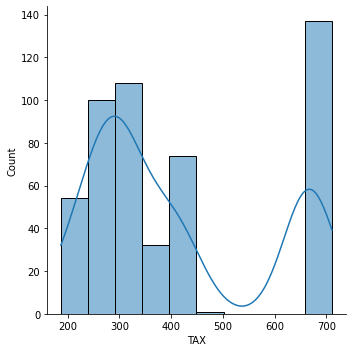

<Figure size 504x288 with 0 Axes>

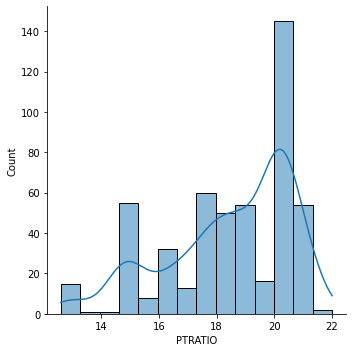

<Figure size 504x288 with 0 Axes>

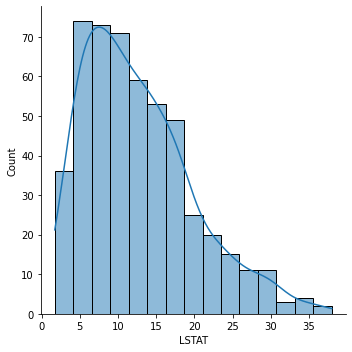

<Figure size 504x288 with 0 Axes>

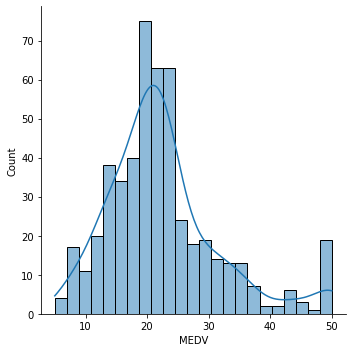

In [14]:
for i in hData.columns:
    plt.figure(figsize=(7, 4))
    sns.displot(hData, x=i, kde=True)
    plt.show()

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

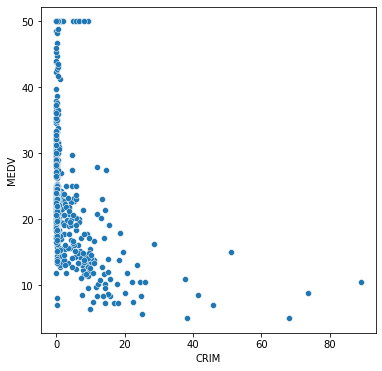

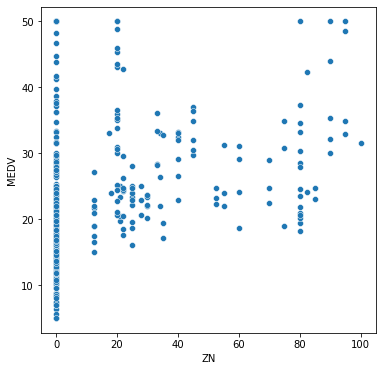

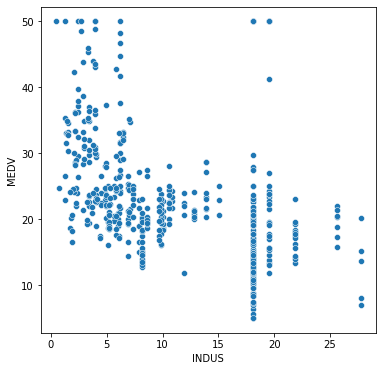

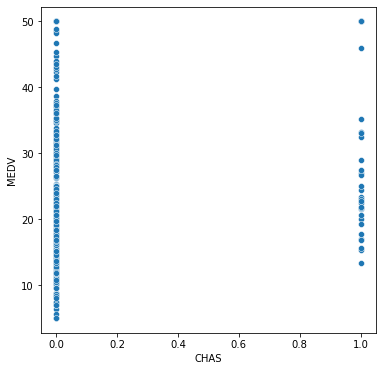

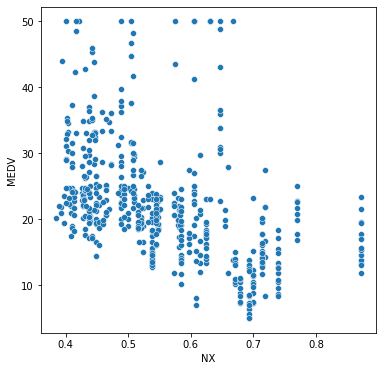

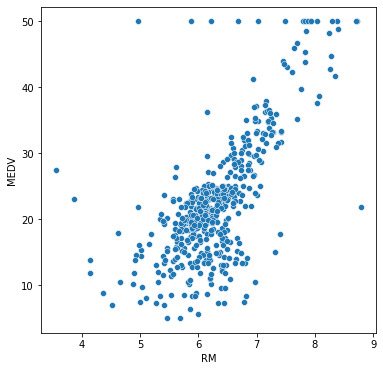

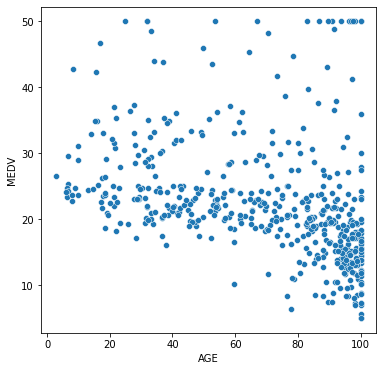

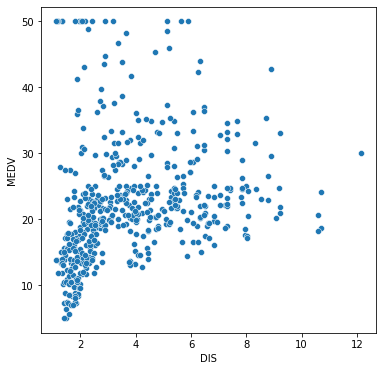

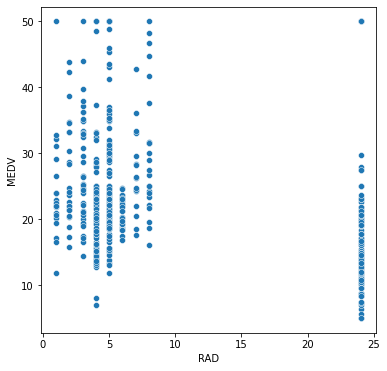

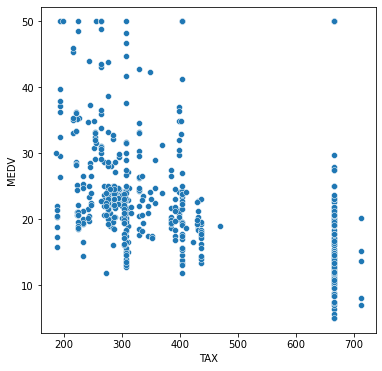

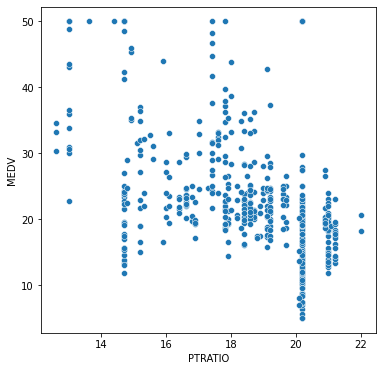

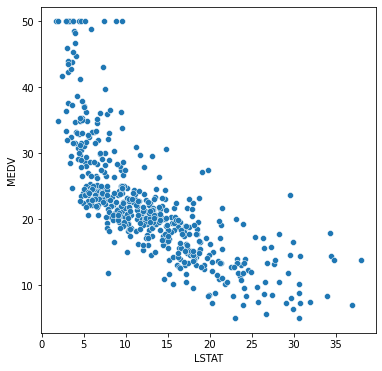

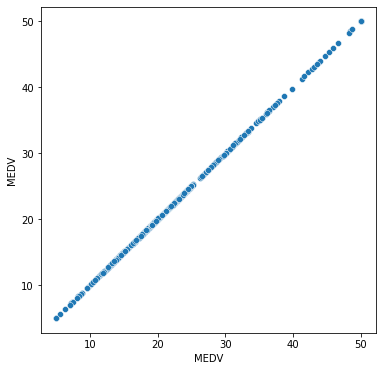

In [16]:
for i in hData.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=hData, x=i, y="MEDV")
    plt.show()

**Plot the correlation heatmap and list your observations.**

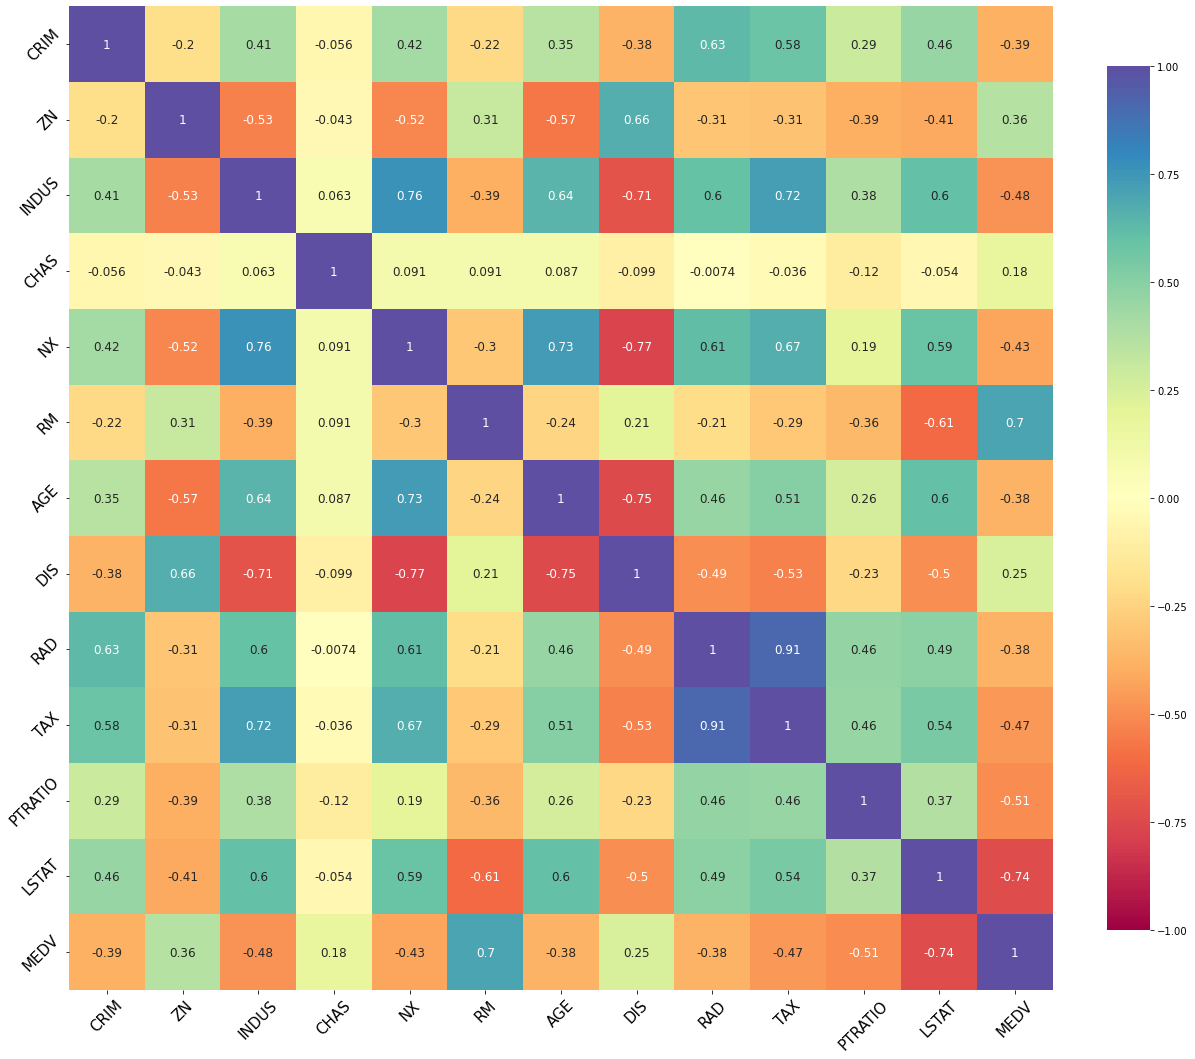

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,16))
fig.tight_layout(pad=2.0)
corr = hData.corr()
sns.heatmap(corr, annot=True, ax=ax, annot_kws={'fontsize':12}, 
            cmap='Spectral',vmin=-1,  vmax = 1, square=True, cbar_kws={'fraction':0.04})#, mask=matrix)
ax.tick_params(axis='both', rotation = 45, labelsize=15)

In [13]:
upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
sorted_mat = upper_corr_mat.unstack().dropna().sort_values(ascending=False)
sorted_mat

/tmp/ipykernel_127545/1603046354.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


TAX    RAD      0.910228
NX     INDUS    0.763651
AGE    NX       0.731470
TAX    INDUS    0.720760
MEDV   RM       0.695360
                  ...   
LSTAT  RM      -0.613808
DIS    INDUS   -0.708027
MEDV   LSTAT   -0.737663
DIS    AGE     -0.747881
       NX      -0.769230
Length: 78, dtype: float64

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [54]:
# independant variables
X = hData.drop(['MEDV'], axis=1)
y = hData[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Model Building

**Fit the model to the training set**

In [55]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [56]:
linmodel.score(X_train, y_train)

0.7073732058856179

**Write your own function for the R-squared score.**

In [58]:
def r_squared(model, x, y):
    y = y.to_numpy()
    ymean = y.mean()
    yhat = model.predict(x)
    SST = np.sum((y - ymean)**2)
    SSE = np.sum((y - yhat)**2)
    return (1 - SSE/SST)

r_squared(linmodel, X_train, y_train)    


0.7073732058856179

**Get the score on test set**

In [59]:
linmodel.score(X_test, y_test)

0.7721684899134145

**Get the RMSE on test set**

In [62]:
np.sqrt(mean_squared_error(y_test, linmodel.predict(X_test)))

4.569658652745815

**Get the model coefficients.**

In [65]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linmodel.coef_[0][idx]))
print("The intercept is {}".format(linmodel.intercept_[0]))

The coefficient for CRIM is -0.11384484836914398
The coefficient for ZN is 0.061170268040605366
The coefficient for INDUS is 0.05410346495873661
The coefficient for CHAS is 2.517511959122722
The coefficient for NX is -22.24850234508451
The coefficient for RM is 2.698412820009945
The coefficient for AGE is 0.004836047284750537
The coefficient for DIS is -1.5342953819992688
The coefficient for RAD is 0.2988332548590216
The coefficient for TAX is -0.011413580552025265
The coefficient for PTRATIO is -0.9889146257039346
The coefficient for LSTAT is -0.5861328508499015
The intercept is 49.88523466381725


**Automate the equation of the fit**